In [2]:
import pandas as pd
import numpy as np

In [15]:

data = pd.read_csv( '/content/carbon_nanotubes.csv', sep=';',decimal=',')
data


,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...
10716,12,6,0.834201,0.399891,0.891270,0.841858,0.405882,0.891356
10717,12,6,0.698374,0.244710,0.962699,0.706555,0.248416,0.962833
10718,12,6,0.923823,0.568913,0.819842,0.929403,0.576284,0.819879
10719,12,6,0.934978,0.602319,0.938889,0.941844,0.610608,0.938755


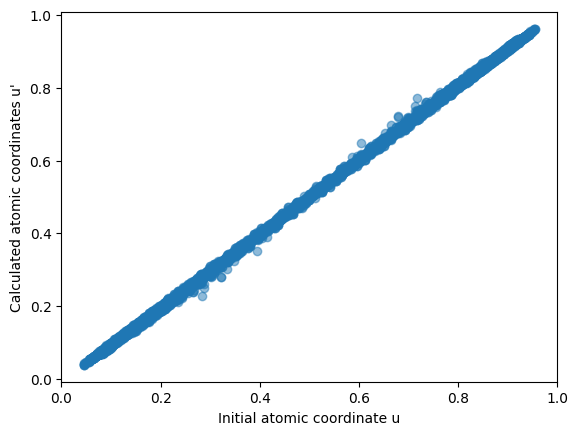

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data['Initial atomic coordinate u'],data["Calculated atomic coordinates u'"],alpha=0.5)
plt.xlabel('Initial atomic coordinate u')
plt.ylabel("Calculated atomic coordinates u'")

plt.show()

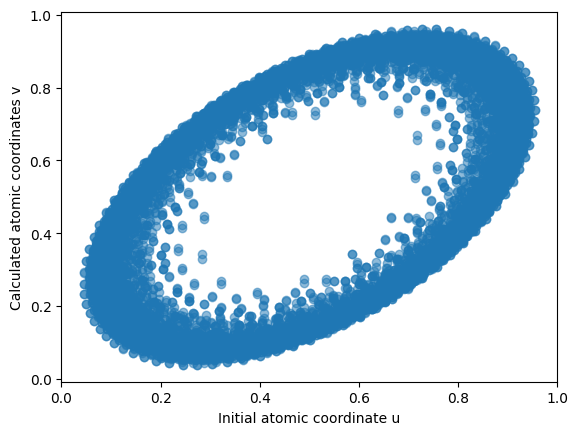

In [23]:
plt.scatter(data['Initial atomic coordinate v'],data["Calculated atomic coordinates v'"],alpha=0.5)
plt.xlabel('Initial atomic coordinate v')
plt.ylabel("Calculated atomic coordinates v")
plt.show()

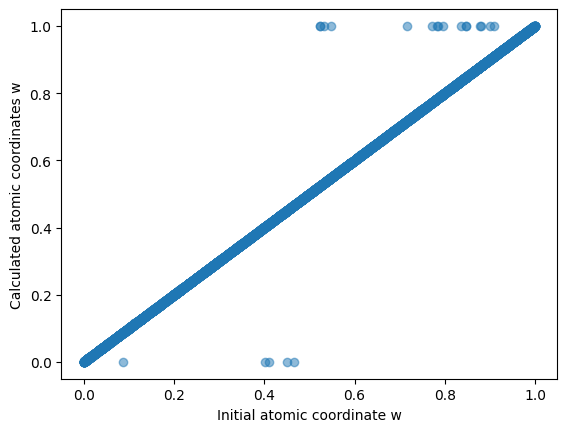

In [24]:
plt.scatter(data['Initial atomic coordinate w'],data["Calculated atomic coordinates w'"],alpha=0.5)
plt.xlabel('Initial atomic coordinate w')
plt.ylabel("Calculated atomic coordinates w")
plt.show()

In [65]:

x_cols=[["Initial atomic coordinate w","Chiral indice n","Chiral indice n"]]
y_cols=[["Calculated atomic coordinates w'"]]

In [67]:
x=np.array(data[["Chiral indice n","Chiral indice n","Initial atomic coordinate u"]])
y=np.array(data["Calculated atomic coordinates w'"])

In [77]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
x_train = X_train
Y_train = y_train.reshape(-1,1)
print(x_train.shape)

print(Y_train.shape)


(7504, 3)
(7504, 1)


**LinearRegression**

In [78]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
r2_score_lr=model1.score(x_train,Y_train)
r2_score_lr


-6.080169937794366e-05

In [80]:
pred = model1.predict(x)
pred

array([0.51201116, 0.51209308, 0.51160542, ..., 0.49214914, 0.492173  ,
       0.49221297])

array([[5.57703718],
       [3.22558039],
       [5.23717229],
       ...,
       [5.27591998],
       [2.42094363],
       [3.22558039]])

In [63]:
from sklearn.linear_model import BayesianRidge
model2 = BayesianRidge()
train = y_train
model2.fit(X_train,train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [64]:
model2_r2=model2.score(X_train,y_train)
model2_r2

0.9998378049461458

In [82]:
y_pred= model1.predict(X_train)
y_pred

array([0.1499926 , 0.17616867, 0.70791518, ..., 0.08639169, 0.60370842,
       0.90991694])